# Notebook implementing and testing MAP

Goal of this notebook is to gain understanding of the MAP Procedure 

https://machinelearningmastery.com/maximum-a-posteriori-estimation/

## What is MAP? 

Maximum A Posteriori Esimation is the procedure of estimating some distributions parameters given data from that distribution viewed from Bayesian Satistics. So if we have n samples from a normal distribution (or any other) without knowing the parameters such as mean and standard deviation, we can estimate their most likely values. 

## Bayesian Stastistics 

Bayes theorem provides a way of calculating conditional probabilities. We can find the conditional probabilities given two outcomes. 

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Often we call the $P(A|B)$ value **a posterior probability** of A given B, and P(A) is thought of as the prior probability of A. 

We can remove the normalizing constant, P(B) and are left with a proportional relationship. 

$P(A|B)  \propto  P(B|A)P(A)$

Which we can simplify to 

$P(A|B) = P(B|A)P(A)$

As optimizing this equals optimizing the proportionality, however simpler due to not caring about a proportionality constant. 

We end up with the maximization problem 

$max_{\theta} P(\theta|X) P(\theta)$

So we see we can maximize the distribution $P(\theta|X)$, the same as MLE, using also information from the distribution over our parameters $P(\theta)$, though we require additional information, namely $P(\theta)$

## Example

### Data 

Obtaining exponentially distributed data with a scale drawn from normal distribution

3.8477041339441236


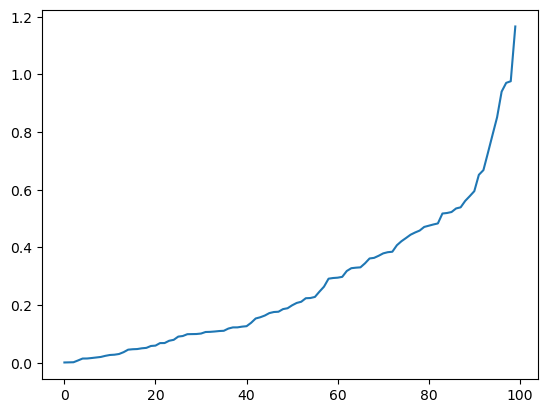

In [322]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema


scale = np.random.normal(loc=5, scale=0.5)
print(scale)
data = np.random.exponential(scale=1/scale, size=(100))
data = np.sort(data)
plt.plot(data)

In [323]:


def exponential(data, **params):
    theta = params["theta"]

    return theta*np.exp(-(theta*data))
 
def normal(**params): 
    theta = params["theta"]
    loc = params["loc"]
    scale = params["scale"]
    
    const = 1/(np.sqrt(2*np.pi*scale**2))
    factor = np.exp(-(theta-loc)**2 / (2*scale**2))

    return const*factor
    
def MAP(data, func1, func2, **params): 

    f1 = np.sum(np.log(func1(data, **params)))
    f2 = np.log(func2(**params))

    return f1+f2



In [324]:
n_lambdas = 500
lambdas = np.sort(np.random.normal(loc=5, scale=scale, size=(n_lambdas)))
likelihoods = [MAP(data, exponential, normal, theta=lambdas[i], loc=5, scale=scale) for i in range(n_lambdas)]


/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_34491/1433370107.py:18: RuntimeWarning: invalid value encountered in log
  f1 = np.sum(np.log(func1(data, **params)))


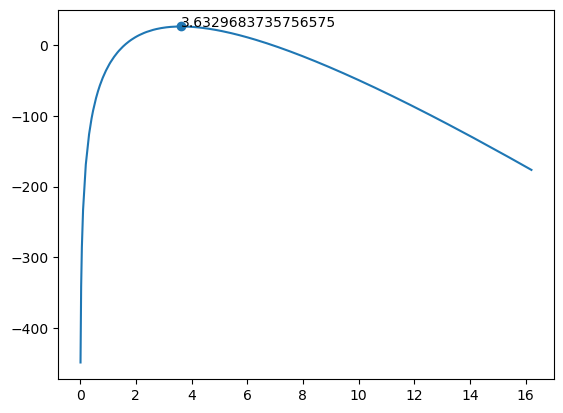

In [325]:

maxima = argrelextrema(np.array(likelihoods), np.greater)
max_idx = maxima[0][0]

plt.plot(lambdas, likelihoods)
plt.scatter(lambdas[max_idx], likelihoods[max_idx])
plt.annotate(f"{lambdas[max_idx]}", (lambdas[max_idx], likelihoods[max_idx]))
plt.show()

## Results 

We see that our estimate is more close to the distribution mean behind the priori distribution, $P(\theta)$. Also we see from the MAP function that we maximize a weighting between the priori distribution and the likelihood. Kinda asking the question "how likely is the likelihood" given the probability of the parameter we used. $P(\theta|X)*P(\theta)$

If the intuition is a weighted relationship between the likelihood and the priori distribution we would assume the resulting maximizing estimate will differ based on its properties.  
In our example, if the distribution is broad, meaning $\sigma$ = low, probability of having a specific $\theta$ shrinks and we have that the priori distribution affects our estimate a lot. Conversly is also true.  

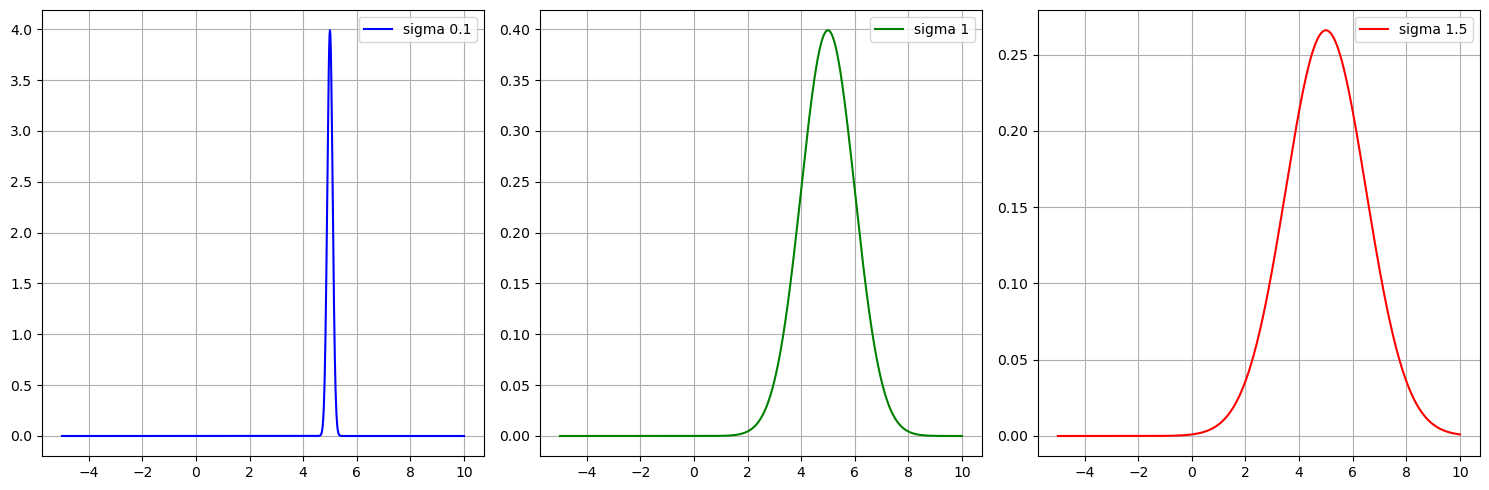

In [326]:
def normal_distribution(data, **params): 
    loc = params["loc"]
    scale = params["scale"]
    
    const = 1/(np.sqrt(2*np.pi*scale**2))
    factor = np.exp(-(data-loc)**2 / (2*scale**2))

    return const*factor

x = np.linspace(-5, 10, 1000)
loc = 5
scales = [0.1, 1, 1.5]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot on each subplot
axes[0].plot(x, normal_distribution(x, scale=scales[0], loc=loc), label=f'sigma {scales[0]}', color='blue')

axes[0].legend()
axes[0].grid(True)

axes[1].plot(x, normal_distribution(x, scale=scales[1], loc=loc), label=f'sigma {scales[1]}', color='green')

axes[1].legend()
axes[1].grid(True)

axes[2].plot(x, normal_distribution(x, scale=scales[2], loc=loc), label=f'sigma {scales[2]}', color='red')

axes[2].legend()
axes[2].grid(True)

# Adjust spacing between plots
fig.tight_layout()

# Display the plots
plt.show()

From the above distributions we expect the distribution with $\sigma$ = 0.1 tuning the MAP toward 5 whilst the distribution with $\sigma$ = 1 having MAP closer to the log likelihood

In [327]:

n_lambdas = 500
lambdas_01 = np.sort(np.random.normal(loc=5, scale=scales[0], size=(n_lambdas)))
lambdas_05 = np.sort(np.random.normal(loc=5, scale=scales[1], size=(n_lambdas)))
lambdas_10 = np.sort(np.random.normal(loc=5, scale=scales[2], size=(n_lambdas)))

likelihoods_01 = [MAP(data, exponential, normal, theta=lambdas_01[i], loc=5, scale=scales[0]) for i in range(n_lambdas)]
likelihoods_05 = [MAP(data, exponential, normal, theta=lambdas_05[i], loc=5, scale=scales[1]) for i in range(n_lambdas)]
likelihoods_10 = [MAP(data, exponential, normal, theta=lambdas_10[i], loc=5, scale=scales[2]) for i in range(n_lambdas)]


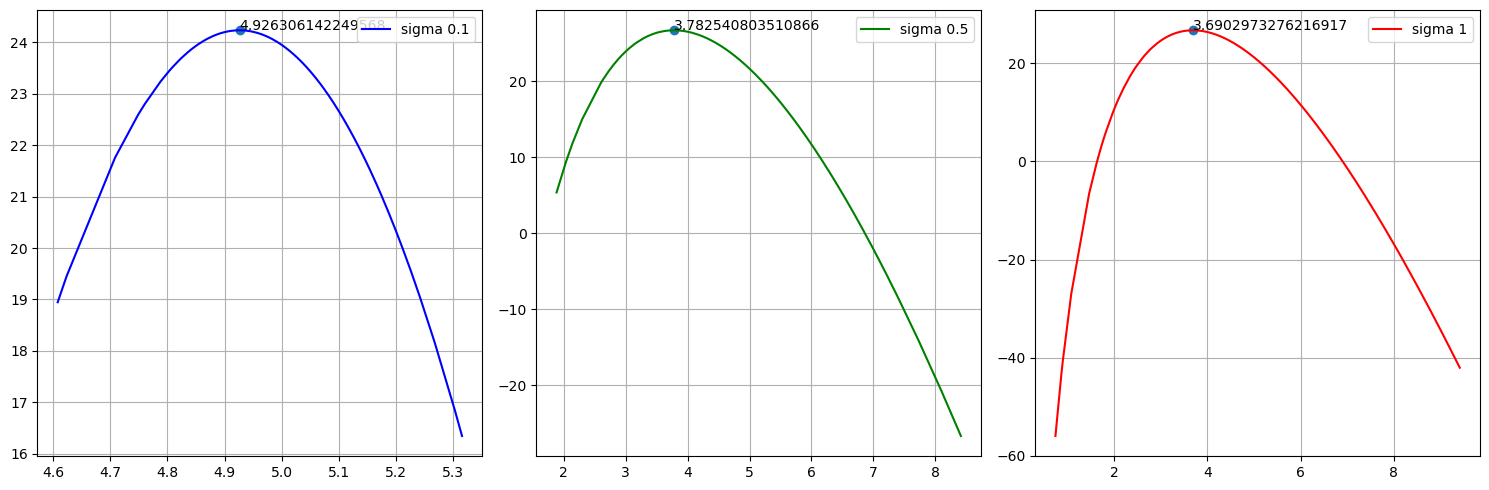

In [328]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot on each subplot
maxima = argrelextrema(np.array(likelihoods_01), np.greater)
max_idx = maxima[0][0]
axes[0].plot(lambdas_01, likelihoods_01, label='sigma 0.1', color='blue')
axes[0].scatter(lambdas_01[max_idx], likelihoods_01[max_idx])
axes[0].annotate(f"{lambdas_01[max_idx]}", (lambdas_01[max_idx], likelihoods_01[max_idx]))
axes[0].legend()
axes[0].grid(True)

maxima = argrelextrema(np.array(likelihoods_05), np.greater)
max_idx = maxima[0][0]
axes[1].plot(lambdas_05, likelihoods_05, label='sigma 0.5', color='green')
axes[1].scatter(lambdas_05[max_idx], likelihoods_05[max_idx])
axes[1].annotate(f"{lambdas_05[max_idx]}", (lambdas_05[max_idx], likelihoods_05[max_idx]))
axes[1].legend()
axes[1].grid(True)

maxima = argrelextrema(np.array(likelihoods_10), np.greater)
max_idx = maxima[0][0]
axes[2].plot(lambdas_10, likelihoods_10, label='sigma 1', color='red')
axes[2].scatter(lambdas_10[max_idx], likelihoods_10[max_idx])
axes[2].annotate(f"{lambdas_10[max_idx]}", (lambdas_10[max_idx], likelihoods_10[max_idx]))
axes[2].legend()
axes[2].grid(True)

# Adjust spacing between plots
fig.tight_layout()

# Display the plots
plt.show()

And as in this example, our theta used when generating the data was 3.84 whilst centered at 5. We have much higher weighting from the narrow distribution, making it closer to 5 still. However the lesser weighting from the broader distributions make our resulting estimate tend towards the MLE.  

As this is thightly related to MLE its prone to the same difficulties. We have a parameter space that could have several maxima and traps. 